In [5]:
'''A1'''
import pandas as pd
import numpy as np

# Load the Excel file
file_path1 = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
df = pd.read_excel(file_path1)

# Separate the embeddings and the class labels
embedding_columns = df.columns[:-1]  # All columns except the last one
class_labels = df['output']

# Calculate the mean vector (centroid) for each class
centroids = df.groupby('output')[embedding_columns].mean()

# Calculate the standard deviation (spread) for each class
spreads = df.groupby('output')[embedding_columns].std()

# Calculate the Euclidean distance between the centroids of class 0 and class 1
if len(centroids) > 1:  # Ensure there are at least two classes
    centroid_0 = centroids.loc[0.0].values
    centroid_1 = centroids.loc[1.0].values
    interclass_distance = np.linalg.norm(centroid_0 - centroid_1)
else:
    interclass_distance = None

# Output the results
print("Class Centroids:\n", centroids)
print("\nClass Spreads:\n", spreads)
print("\nInterclass Distance between class 0 and class 1:", interclass_distance)


Class Centroids:
          embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
output                                                                         
0.000  -0.153674  0.211456  0.155295  0.093863 -0.488665 -0.194348  0.140355   
0.250  -0.255277  0.263835  0.213473  0.191470 -0.306339 -0.075046  0.250660   
0.375  -0.239879  0.339333  0.293421  0.249637 -0.630448  0.360250  0.289443   
0.500  -0.232833  0.149298  0.124647  0.125998 -0.417329 -0.131600  0.131462   
0.625  -0.017249  0.081590 -0.080917  0.178040 -0.474333 -0.102767  0.450282   
...          ...       ...       ...       ...       ...       ...       ...   
4.500  -0.184671  0.044783  0.145434  0.239946 -0.526059 -0.191454  0.096636   
4.625  -0.241622  0.088098  0.096856  0.246243 -0.474478 -0.075730  0.194762   
4.750  -0.197596  0.035643  0.156991  0.234888 -0.483428 -0.271918  0.100167   
4.875  -0.183171  0.088280  0.122521  0.257218 -0.501180 -0.336450  0.267008   
5.000  -0.254796  0.15

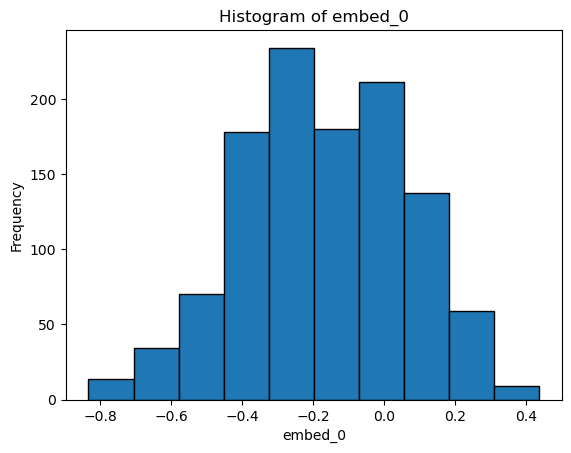

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925803


In [6]:
'''A2'''
import numpy as np
import matplotlib.pyplot as plt

# Select a feature from the dataset
feature_column = 'embed_0'  # Example feature column

# Calculate the histogram data
hist_data, bin_edges = np.histogram(df[feature_column], bins=10)  # 10 bins

# Plot the histogram
plt.hist(df[feature_column], bins=10, edgecolor='black')
plt.xlabel(feature_column)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_column}')
plt.show()

# Calculate mean and variance
mean = np.mean(df[feature_column])
variance = np.var(df[feature_column])

print(f"Mean of {feature_column}: {mean}")
print(f"Variance of {feature_column}: {variance}")


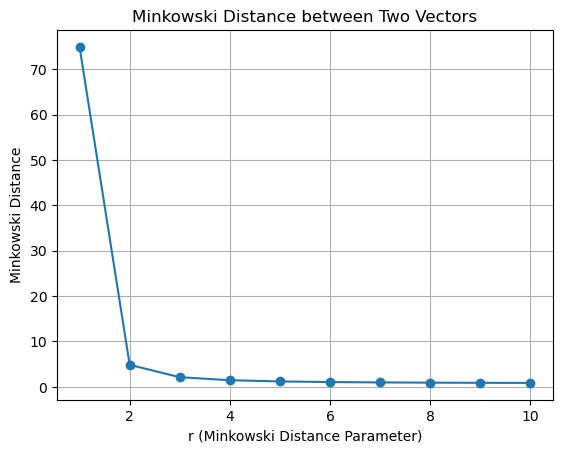

In [7]:
'''A3'''
from scipy.spatial import distance

# Select two feature vectors (rows) from the dataset
vector_1 = df.iloc[0, :-1].values  # Example: First row, excluding the class label
vector_2 = df.iloc[1, :-1].values  # Example: Second row, excluding the class label

# Calculate Minkowski distances for r from 1 to 10
minkowski_distances = []
r_values = range(1, 11)

for r in r_values:
    dist = distance.minkowski(vector_1, vector_2, r)
    minkowski_distances.append(dist)

# Plot the Minkowski distance vs. r
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r (Minkowski Distance Parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Vectors')
plt.grid(True)
plt.show()


In [8]:
'''A4'''
from sklearn.model_selection import train_test_split

# Define the feature matrix (X) and target vector (y)
X = df[embedding_columns].values  # All embedding features
y = df['output'].values  # Class labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the sizes of the train and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 788
Test set size: 338


In [9]:
'''A5'''
# Example: Binning the continuous labels into two classes
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])

from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier using the training set
knn_classifier.fit(X_train, y_train_class)


KNeighborsClassifier(n_neighbors=3)

In [21]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load a sample dataset
data = load_iris()
X = data.data
y = data.target

# For binary classification, we will convert the problem to binary
# For example purposes, let's create a binary problem by keeping only two classes
X, y = X[y != 2], y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Generate predictions for the test set
y_pred = knn_classifier.predict(X_test)

# If y_test is binary and already in the correct format, you don't need binarization
# Check the unique values in y_test and y_pred
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the kNN classifier: {accuracy * 100:.2f}%")


Unique values in y_test: {0, 1}
Unique values in y_pred: {0, 1}
Accuracy of the kNN classifier: 100.00%


In [15]:
'''A7'''
# Use the kNN classifier to predict the class labels for the test set
predictions = knn_classifier.predict(X_test)

# Output the predictions and compare with actual labels
print("Predictions:", predictions)
print("Actual labels:", y_test)

# Select any test vector from your test set
test_vect = X_test[0].reshape(1, -1)  # Example: First vector from the test set

# Predict the class of the test vector using the trained kNN classifier
predicted_class = knn_classifier.predict(test_vect)

# Output the predicted class
print(f"Predicted class for the test vector: {predicted_class[0]}")



Predictions: [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1]
Actual labels: [5.         5.         3.75       1.875      4.75       3.
 4.         2.91666667 5.         4.5        2.75       3.75
 4.5        3.         1.25       2.625      2.         2.375
 3.5        2.5        2.625      3.75       4.         3.
 2.75       2.5        2.5        1.        

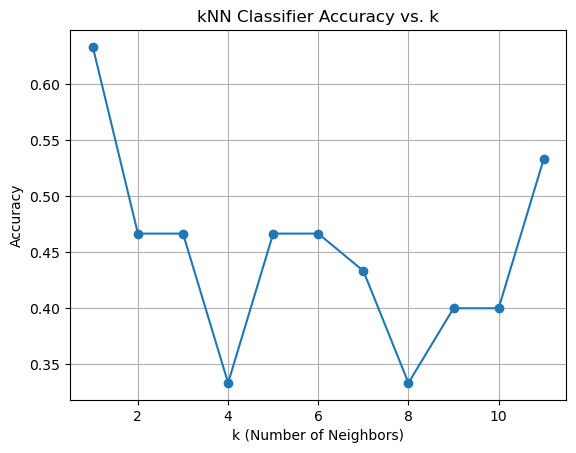

Accuracy with k=1: 63.33%
Accuracy with k=2: 46.67%
Accuracy with k=3: 46.67%
Accuracy with k=4: 33.33%
Accuracy with k=5: 46.67%
Accuracy with k=6: 46.67%
Accuracy with k=7: 43.33%
Accuracy with k=8: 33.33%
Accuracy with k=9: 40.00%
Accuracy with k=10: 40.00%
Accuracy with k=11: 53.33%


In [18]:
'''A8'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Example continuous labels
y = np.random.rand(100) * 100  # Replace this with your actual y_train data

# Convert continuous labels to discrete classes (binning)
y_binned = np.digitize(y, bins=np.linspace(min(y), max(y), num=3))  # Binning into 3 classes

# Create a sample feature set X
X = np.random.rand(len(y), 5)  # Replace with your actual feature data

# Split the dataset
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# List to store accuracy for different values of k
k_values = list(range(1, 12))
accuracies = []

# Iterate over k values from 1 to 11
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_class)
    accuracy = knn.score(X_test, y_test_class)
    accuracies.append(accuracy)

# Plot the accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Accuracy vs. k')
plt.grid(True)
plt.show()

# Output accuracy values for comparison
for k, accuracy in zip(k_values, accuracies):
    print(f"Accuracy with k={k}: {accuracy * 100:.2f}%")


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load a sample dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Generate predictions for both the training and test sets
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)

# Evaluate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix (Test Set):\n", conf_matrix)

# Calculate and print precision, recall, and F1-score for both training and test sets
print("\nClassification Report (Training Set):\n", classification_report(y_train, train_predictions))
print("Classification Report (Test Set):\n", classification_report(y_test, test_predictions))


Confusion Matrix (Test Set):
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.89      0.93        37
           2       0.90      0.97      0.94        37

    accuracy                           0.95       105
   macro avg       0.96      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

